Treinando minha primeira rede neural: classificação básica

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

Importe a base de dados Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_imagens, train_labels), (test_imagens, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Incluídos os nomes das classes

In [3]:
class_name = [
    'Camisetas/Top', 'Calça', 'Suéter', 'Vestidos', 'Casaco', 'Sandálias', 
    'Camisas', 'Tênis', 'Bolsa', 'Botas' 
]

Explore os dados

In [4]:
train_imagens.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_imagens.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

Pré-processo dos dados

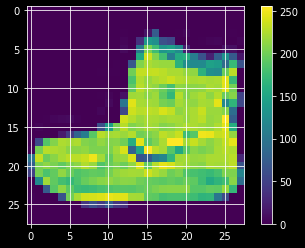

In [9]:
plt.figure()
plt.imshow(train_imagens[0])
plt.colorbar()
plt.grid()
plt.show()

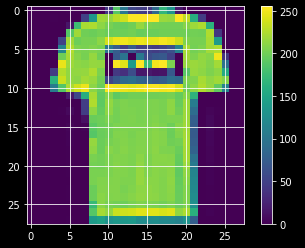

In [10]:
plt.figure()
plt.imshow(train_imagens[1])
plt.colorbar()
plt.grid()
plt.show()

Dividido os valores por 255

In [11]:
train_imagens = train_imagens / 255.0
test_imagens = test_imagens / 255.0

Verificando se os dados estão corretos e mostrando os primeiras 25 imagens

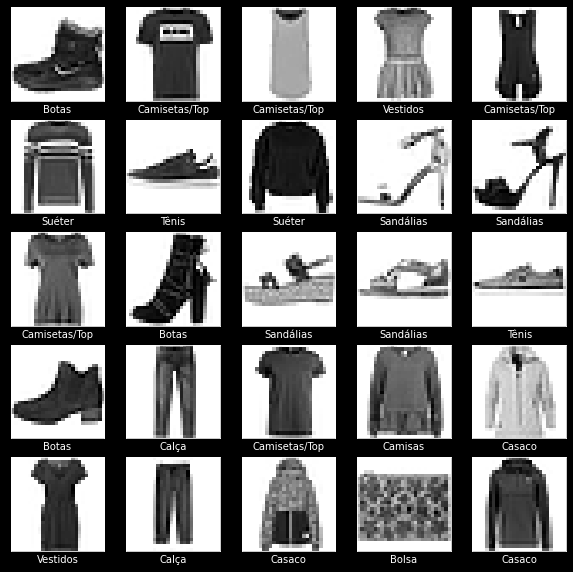

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imagens[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

Construindo o modelo

In [14]:
# Montar as camadas
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compilando o modelo 

In [15]:
modelo.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

Treinado o modelo

In [16]:
modelo.fit(train_imagens, train_labels, epochs=32)

Epoch 1/32
1875/1875 [==============================] - 31s 7ms/step - loss: 0.5010 - accuracy: 0.8230
Epoch 2/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3759 - accuracy: 0.8638
Epoch 3/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3384 - accuracy: 0.8771
Epoch 4/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3129 - accuracy: 0.8849
Epoch 5/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2953 - accuracy: 0.8915
Epoch 6/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2820 - accuracy: 0.8950
Epoch 7/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2684 - accuracy: 0.9014
Epoch 8/32
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2595 - accuracy: 0.9036
Epoch 9/32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2493 - accuracy: 0.9074
Epoch 10/32
1875/1875 [==============================] - 13s 7ms/step - l

Avalie a acurácia

In [17]:
test_loss, test_acc = modelo.evaluate(test_imagens,  test_labels, verbose=2)

print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - loss: 0.3966 - accuracy: 0.8933 - 2s/epoch - 6ms/step

Test accuracy: 0.8932999968528748


Fazendo a predição

In [18]:
predicao = modelo.predict(test_imagens)

313/313 [==============================] - 1s 3ms/step


In [19]:
predicao[0]

array([5.2588951e-15, 6.6661182e-17, 3.1988320e-15, 2.1506002e-25,
       2.2449829e-15, 4.3074652e-07, 2.3178044e-13, 2.8880781e-05,
       5.6470657e-14, 9.9997067e-01], dtype=float32)

In [20]:
np.argmax(predicao[0])

9

In [21]:
test_labels[0]

9

Visualizando as previsão de 10 classes 

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_name[predicted_label], 100*np.max(predictions_array),
        class_name[true_label]), color=color
    )

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

visualizando a previsão do posição 0

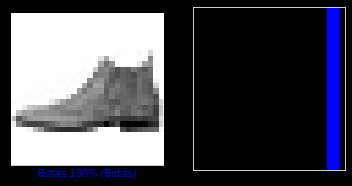

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicao, test_labels, test_imagens)
plt.subplot(1,2,2)
plot_value_array(i, predicao,  test_labels)
plt.show()

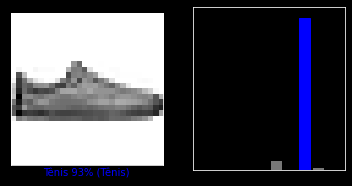

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicao, test_labels, test_imagens)
plt.subplot(1,2,2)
plot_value_array(i, predicao,  test_labels)
plt.show()

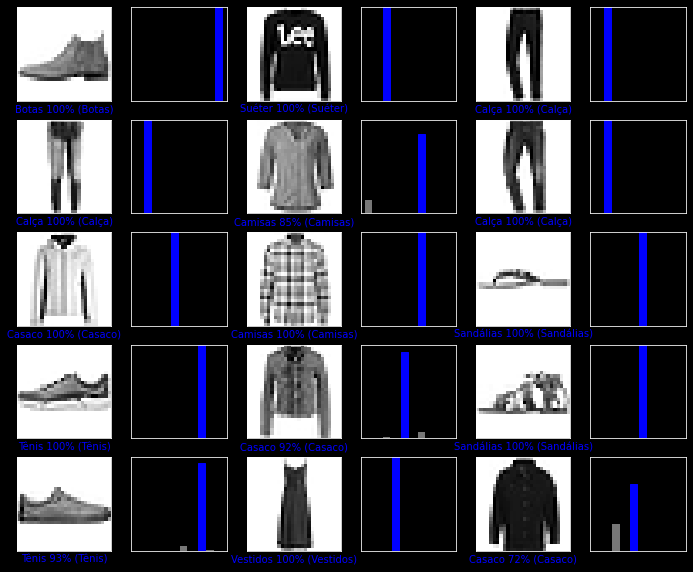

In [25]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predicao, test_labels, test_imagens)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predicao, test_labels)
plt.show()